Importing necesarry packages and libraries.

In [41]:
import numpy as np 
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

Reading Data

In [42]:
train_ds = pd.read_csv("./train.csv")
train_ds.head()
train_ds.columns
train_ds['price_range'].value_counts()
train_ds.info()
test_ds = pd.read_csv("./test.csv")
test_ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


Error Checking

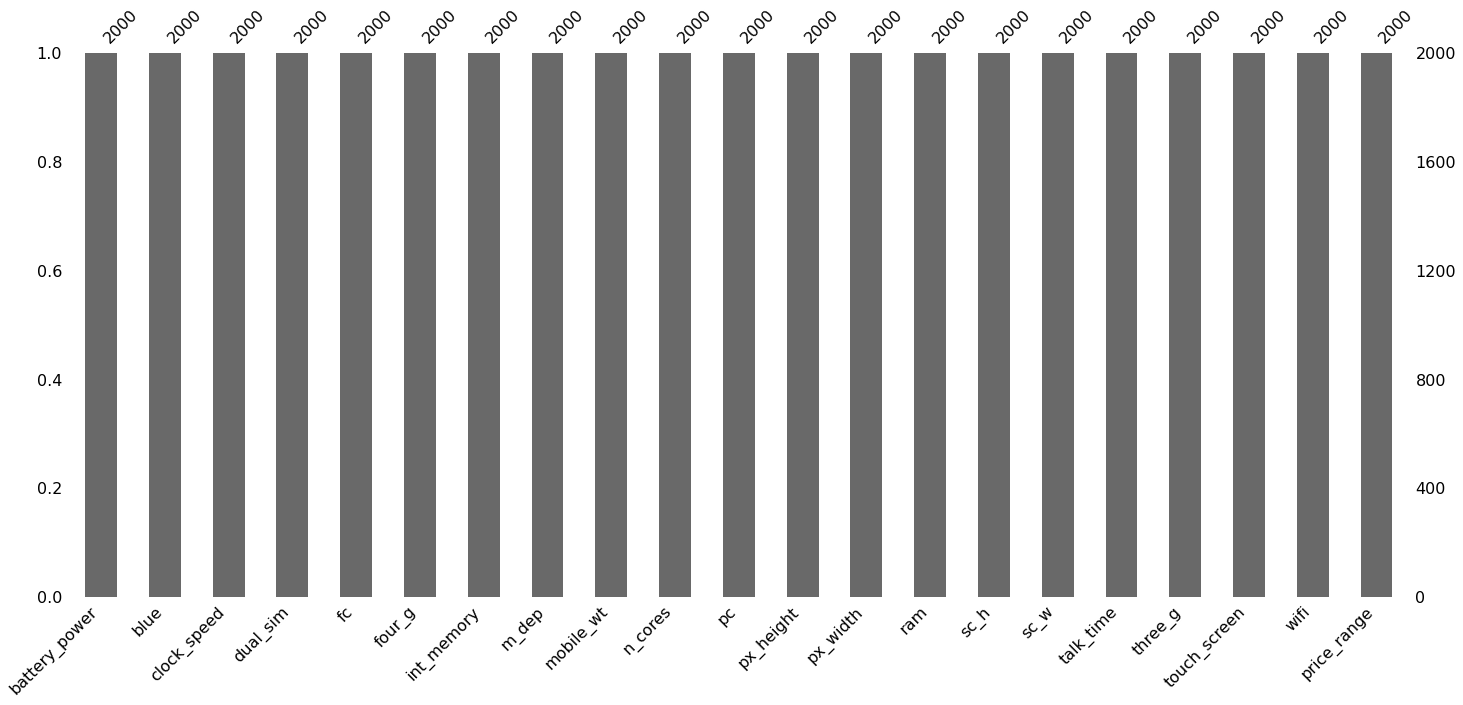

In [44]:
msno.bar(train_ds)
plt.show()

Spiltting Data

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_ds.drop('price_range',axis=1), train_ds['price_range'],test_size=0.2, random_state=5)

Model training using Logistic Regression

In [ ]:
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Create model and fit it
LR = LogisticRegression()
LR.fit(x_train,y_train)

Testing with Logistic Regression model

In [47]:
y_pred = LR.predict(x_test)
accuracy_score(y_test,y_pred)

0.6675

Logisitc Regression's Confusion Matrix

In [48]:
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       103
           1       0.60      0.60      0.60        92
           2       0.49      0.46      0.47       101
           3       0.67      0.74      0.70       104

    accuracy                           0.67       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.67      0.67       400



Model training using KNN

In [ ]:
# Import packages
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(x_train, y_train)

Testing with KNN model

In [50]:
y_pred1 = neigh.predict(x_test)
accuracy_score(y_test,y_pred1)

0.91

KNN's Confusion Matrix

In [51]:
confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.88      0.91      0.89        92
           2       0.84      0.89      0.87       101
           3       0.99      0.86      0.92       104

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



Model training using SVM

In [ ]:
# Import packages
from sklearn.svm import SVC

# Create and fit the model
svc = SVC(C=1,kernel='linear',gamma = 0.001)
svc.fit(x_train, y_train)

Testing with SVM model



In [53]:
y_pred2 = svc.predict(x_test)
accuracy_score(y_test,y_pred2)

0.98

SVM's Confusion Matrix

In [54]:
confusion_matrix(y_test,y_pred2)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.97      0.99      0.98        92
           2       0.95      0.98      0.97       101
           3       1.00      0.96      0.98       104

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Predictions

In [55]:
test_pred = svc.predict(test_ds.drop('id',axis=1))
test_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 2, 2, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,